In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.layers import Input,Average
import numpy as np
import tensorflow as tf
from tensorflow import keras
my_generator= ImageDataGenerator(rescale=1./255, validation_split=0.1) #rescaled the images
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Concatenate,MaxPool2D
from keras.models import Model
from keras.layers import Input, Dense, Conv2D,Flatten,Dropout,AvgPool2D
import os
import cv2
import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image_train = my_generator.flow_from_directory('/content/drive/MyDrive/Data/train', #this is the image generator next we need to read the data from it
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse',
        subset="training") #does not fully load the data into the memory instead it created a channel  
validation_image= my_generator.flow_from_directory('/content/drive/MyDrive/Data/train',
        target_size=(150, 150),
        batch_size=32,
        subset="validation",
        class_mode='sparse' )
test = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        class_mode='sparse')

Found 11524 images belonging to 104 classes.
Found 1229 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


In [5]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
) 
base_model.trainable = False

83683744/83683744 [==============================] - 3s 0us/step


In [6]:
m=load_model('/content/drive/MyDrive/SimpleCNNBETTER')

In [10]:
T = m.input

In [11]:
x = base_model(T, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(T, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_____________________________________________

In [12]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
hist = m.fit_generator(generator=image_train, validation_data= validation_image,epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


361/361 [==============================] - 3932s 11s/step - loss: 3.7511 - accuracy: 0.1089 - val_loss: 3.7116 - val_accuracy: 0.1302
Epoch 2/15
361/361 [==============================] - 49s 135ms/step - loss: 3.7303 - accuracy: 0.1059 - val_loss: 3.6915 - val_accuracy: 0.1294
Epoch 3/15
361/361 [==============================] - 49s 134ms/step - loss: 3.7050 - accuracy: 0.1159 - val_loss: 3.6694 - val_accuracy: 0.1253
Epoch 4/15
361/361 [==============================] - 49s 135ms/step - loss: 3.6750 - accuracy: 0.1138 - val_loss: 3.6897 - val_accuracy: 0.1400
Epoch 5/15
361/361 [==============================] - 48s 133ms/step - loss: 3.6331 - accuracy: 0.1221 - val_loss: 3.6520 - val_accuracy: 0.1448
Epoch 6/15
361/361 [==============================] - 48s 133ms/step - loss: 3.6093 - accuracy: 0.1240 - val_loss: 3.6235 - val_accuracy: 0.1432
Epoch 7/15
361/361 [==============================] - 48s 133ms/step - loss: 3.5797 - accuracy: 0.1214 - val_loss: 3.6179 - val_accuracy: 0.1

In [15]:
transferLearning= model.save('/content/drive/MyDrive/TransferLearning')

In [14]:
score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.01778017170727253


In [16]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 32 samples")
predictions = model.predict(test)
print("predictions shape:", predictions.shape)

testy = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        batch_size=16474,
        class_mode='sparse')


Generate predictions for 32 samples
116/116 [==============================] - 15s 127ms/step
predictions shape: (3712, 1)
Found 3712 images belonging to 104 classes.


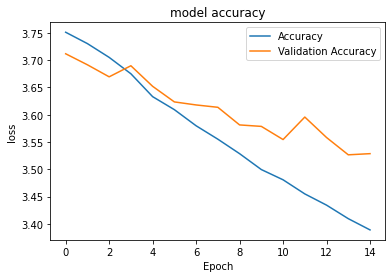

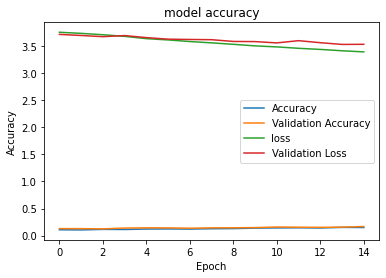

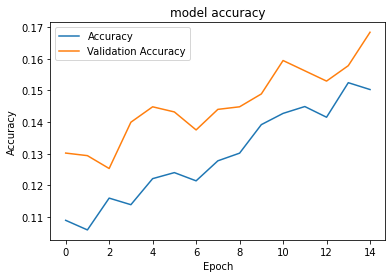

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
####################################
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
##############################
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

In [18]:
testy = my_generator.flow_from_directory(
        directory='/content/drive/MyDrive/Data/test',
        target_size=(150, 150),
        batch_size=16474,
        class_mode='sparse')


for X_test, Y_test in testy:
   break

Found 3712 images belonging to 104 classes.


In [19]:
from sklearn.metrics import f1_score
y_true=testy.classes
y_pred=predictions
y_classes=[np.argmax(CLASSES) for CLASSES in y_pred]
f1_score(y_true, y_classes, average='macro')


0.00040074670778970434